In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('historical_over_under_data.csv', index_col = 0)

In [4]:
df.shape

(578, 4)

In [5]:
df.head()

,Team,win_total,actual_wins,result
0,Atlanta Hawks_99-00,46.5,28,U
1,Atlanta Hawks_01-02,36.5,33,U
2,Atlanta Hawks_02-03,41.5,35,U
3,Atlanta Hawks_03-04,33.0,28,U
4,Atlanta Hawks_04-05,27.5,13,U


In [6]:
df['result'].value_counts(normalize = True)

U    0.513841
O    0.484429
P    0.001730
Name: result, dtype: float64

In [7]:
under25 = df.loc[df.win_total < 25].copy()
under25['result'].value_counts(normalize = True)

O    0.6
U    0.4
Name: result, dtype: float64

In [8]:
over53 = df.loc[df.win_total > 53].copy()
over53['result'].value_counts(normalize = True)

U    0.6
O    0.4
Name: result, dtype: float64

#### For teams who had predicted win totals under 25 or over 53, if you bet overs on the low win totals and unders on the high win totals, you'd have a ~60% success rate.

#### If you make the numbers more extreme (under 23 or over 56), the success rate would be closer to 70%.  

In [9]:
under23 = df.loc[df.win_total < 23].copy()
under23['result'].value_counts(normalize = True)

O    0.666667
U    0.333333
Name: result, dtype: float64

In [10]:
over56 = df.loc[df.win_total > 56].copy()
over56['result'].value_counts(normalize = True)

U    0.707317
O    0.292683
Name: result, dtype: float64

In [11]:
df['difference'] = df['actual_wins'] - df['win_total'] 
df.head()

,Team,win_total,actual_wins,result,difference
0,Atlanta Hawks_99-00,46.5,28,U,-18.5
1,Atlanta Hawks_01-02,36.5,33,U,-3.5
2,Atlanta Hawks_02-03,41.5,35,U,-6.5
3,Atlanta Hawks_03-04,33.0,28,U,-5.0
4,Atlanta Hawks_04-05,27.5,13,U,-14.5


In [12]:
df['difference'].describe()

# makes sense the avg difference is close 0.  Vegas is good at what they do.  
# Note though that the mean is slightly to the negative side, meaning there are slightly more unders than overs

count    578.000000
mean      -0.344291
std        8.328813
min      -31.500000
25%       -5.500000
50%       -0.500000
75%        4.875000
max       27.500000
Name: difference, dtype: float64

<AxesSubplot:>

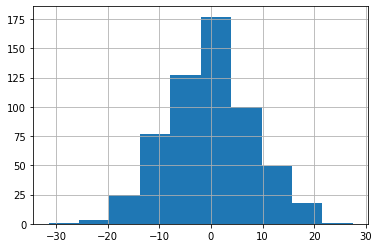

In [13]:
df['difference'].hist()

In [14]:
plus10 = df.loc[(df.difference > 9.5)]
plus10.shape
# 68 of the total 578 teams (11.7%) surpassed their predicted win total by 10 or more games

(68, 5)

In [15]:
minus10 = df.loc[(df.difference < -9.5)]
minus10.shape
# 75 of the total 518 teams (12.9%) came up short of their predicted win total by 10 or more games

(75, 5)

In [16]:
ten_plus = pd.concat([plus10, minus10])

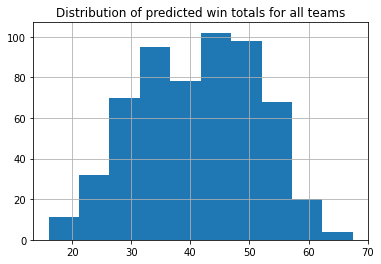

In [17]:
df['win_total'].hist()
plt.title('Distribution of predicted win totals for all teams');

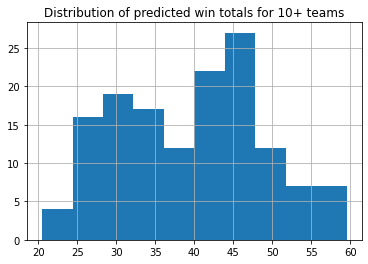

In [18]:
ten_plus['win_total'].hist()
plt.title('Distribution of predicted win totals for 10+ teams');

# the tails for 10+ teams are a little more prominent vs looking at all teams.

#### From 2000-2022, 143 of 578 teams (24.7%) differed from their predicted win total by 10 or more games.  

In [19]:
ten_plus['result'].value_counts(normalize = True)

U    0.524476
O    0.475524
Name: result, dtype: float64

In [20]:
ten_plus['win_total'].describe()

count    143.000000
mean      39.447552
std        9.369322
min       20.500000
25%       31.500000
50%       40.500000
75%       46.500000
max       59.500000
Name: win_total, dtype: float64

In [21]:
df

,Team,win_total,actual_wins,result,difference
0,Atlanta Hawks_99-00,46.5,28,U,-18.5
1,Atlanta Hawks_01-02,36.5,33,U,-3.5
2,Atlanta Hawks_02-03,41.5,35,U,-6.5
3,Atlanta Hawks_03-04,33.0,28,U,-5.0
4,Atlanta Hawks_04-05,27.5,13,U,-14.5
...,...,...,...,...,...
25,Cleveland Cavaliers_21-22,26.5,44,O,17.5
26,Orlando Magic_21-22,22.5,22,U,-0.5
27,Oklahoma City Thunder_21-22,23.5,24,O,0.5
28,Detroit Pistons_21-22,24.5,23,U,-1.5
